In [2]:
import re
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
from tqdm import tqdm
from nltk.corpus import stopwords
stopwordEn = stopwords.words('english')
import pickle

In [30]:
# get one-week news data
FILE = '0323'
with open('df_{}_news.pickle'.format(FILE), 'rb') as handle:
    df = pickle.load(handle)
# with open('df_0324_news.pickle', 'rb') as handle:
#     df_0324 = pickle.load(handle)
# with open('df_0325_news.pickle', 'rb') as handle:
#     df_0325 = pickle.load(handle)
# with open('df_0326_news.pickle', 'rb') as handle:
#     df_0326 = pickle.load(handle)
# with open('df_0327_news.pickle', 'rb') as handle:
#     df_0327 = pickle.load(handle)
# with open('df_0328_news.pickle', 'rb') as handle:
#     df_0328 = pickle.load(handle)
# with open('df_0329_news.pickle', 'rb') as handle:
#     df_0329 = pickle.load(handle)
len(df)

115372

In [5]:
df.head()

,published,text
0,2020-03-23T00:00:00.000+02:00,Tokyo 2020 organisers have started drafting po...
1,2020-03-23T00:00:00.000+02:00,The national animal - the tiger and the nation...
2,2020-03-23T00:00:00.000+02:00,Boeing is suspending its dividend and taking o...
3,2020-03-23T00:00:00.000+02:00,Governor appoints Navy Vice Admiral Raquel C. ...
4,2020-03-23T00:00:00.000+02:00,Afriend of singer Kanika Kapoor who is believe...


# Multiprocessing

In [6]:
import multiprocessing as mp
import numpy as np
import time
print('CPU numbers:',mp.cpu_count())
def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
#     print(kwargs)
    workers = kwargs.pop('workers')
    pool = mp.Pool(processes=workers)
    result = pool.map(_apply_df, [(d, func, kwargs) for d in np.array_split(df, workers)])
    pool.close()
    return pd.concat(list(result))
#apply_by_multiprocessing(fullset['Text'], process_text, workers=cores)

CPU numbers: 32


# Word Frequency

In [11]:
#multiprocessing method
def processText(text):
    tokens = word_tokenize(text)
    return [i for i in tokens if i not in stopwordEn and i.isalpha()]

all_words = []
s_py = time.time()
for i in apply_by_multiprocessing(df['text'], processText, workers=32):
    all_words.extend(i)
print("programme:",time.time()-s_py)

programme: 70.60555863380432


In [12]:
len(all_words)

33856945

In [14]:
words_dict = nltk.FreqDist(all_words)
len(words_dict)

321587

In [19]:
with open('./data_0323_29/news_all_words_{}.pickle'.format(FILE), 'wb') as handle:
    pickle.dump(all_words, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('./data_0323_29/news_words_dict_{}.pickle'.format(FILE), 'wb') as handle:
    pickle.dump(words_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Word clouds

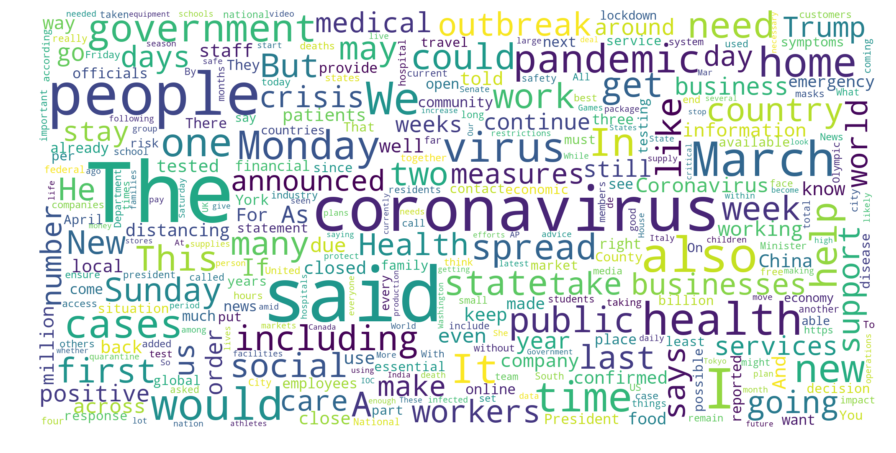

In [15]:
# tags cloud (with retweets)
# https://www.datacamp.com/community/tutorials/wordcloud-python
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# % matplotlib inline

wordcloud = WordCloud(max_font_size=200, width=2000,height=1000, min_font_size=18, max_words=1000, background_color="white").generate_from_frequencies(words_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
words_dict.most_common(30)

[('The', 412237),
 ('said', 331274),
 ('coronavirus', 211873),
 ('people', 190915),
 ('I', 172574),
 ('also', 126276),
 ('March', 123696),
 ('We', 110066),
 ('health', 103600),
 ('would', 102485),
 ('time', 91603),
 ('virus', 89818),
 ('home', 89733),
 ('It', 85269),
 ('cases', 83284),
 ('one', 82969),
 ('Monday', 82654),
 ('pandemic', 79374),
 ('new', 78792),
 ('In', 78715),
 ('government', 75367),
 ('help', 68814),
 ('need', 67587),
 ('public', 64421),
 ('could', 63885),
 ('spread', 63510),
 ('This', 62747),
 ('get', 62639),
 ('state', 62103),
 ('like', 60770)]

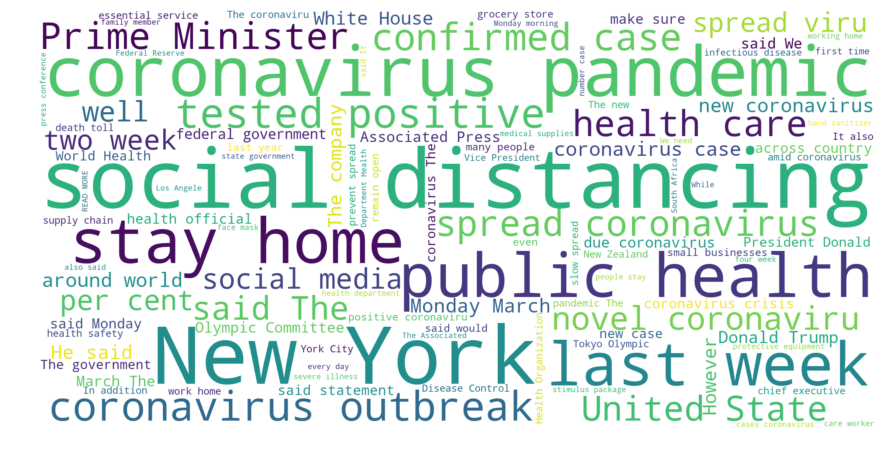

In [20]:
# vocabulary word cloud 2-gram 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# % matplotlib inline

wordcloud = WordCloud(max_font_size=200, width=2000,height=1000, min_font_size=18, max_words=1000, background_color="white").generate(' '.join(all_words))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
wordcloud.words_

{'social distancing': 1.0,
 'New York': 0.9577652454139811,
 'coronavirus pandemic': 0.9101388200297471,
 'stay home': 0.7366447694595935,
 'public health': 0.7159766980664353,
 'last week': 0.6984692612791275,
 'tested positive': 0.6335213187902826,
 'coronavirus outbreak': 0.6181829449677739,
 'confirmed case': 0.5204201784828953,
 'Prime Minister': 0.5094199305899851,
 'health care': 0.47685299950421417,
 'spread coronavirus': 0.4760473475458602,
 'United State': 0.44626921170054534,
 'said The': 0.4007498760535449,
 'novel coronaviru': 0.392879276152702,
 'social media': 0.3449739712444224,
 'well': 0.34345562716906297,
 'per cent': 0.3401710461080813,
 'two week': 0.3327342588001983,
 'spread viru': 0.3247397124442241,
 'coronavirus case': 0.3175818046603867,
 'around world': 0.31333663857213684,
 'Monday March': 0.3090294992563213,
 'He said': 0.3082548339117501,
 'new coronavirus': 0.30704635597421914,
 'The company': 0.2950855230540407,
 'However': 0.29372211204759546,
 'White 

In [31]:
with open('./data_0323_29/news_words_dict_2G_{}.pickle'.format(FILE),'wb') as handle:
    pickle.dump(wordcloud.words_, handle)

# Topic Modelling

In [32]:
from nltk.corpus import wordnet
# nltk.download('wordnet')
# def prepare_text_for_lda(word):
#     if word not in stopwordEn and word.isalpha():
#         lemma = wordnet.morphy(word)
#         if lemma is not None:
#             return lemma
#         else:
#             return word
def prepare_lda(t):
    tokens = []
    for word in word_tokenize(t):
        if word not in stopwordEn and word.isalpha():
            lemma = wordnet.morphy(word)
            if lemma is not None:
                tokens.append(lemma)
            else:
                tokens.append(word)
    return tokens
s_py = time.time()
text_data = apply_by_multiprocessing(df['text'], prepare_lda, workers=32)
print("programme:",time.time()-s_py)

programme: 105.74430346488953


In [33]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = apply_by_multiprocessing(pd.Series(text_data), dictionary.doc2bow, workers=32)
# corpus = [dictionary.doc2bow(text) for text in text_data]

In [34]:
import gensim
NUM_TOPICS = 12
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
# ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.017*"say" + 0.016*"people" + 0.013*"The" + 0.010*"home" + 0.009*"coronavirus"')
(1, '0.017*"The" + 0.013*"say" + 0.011*"abortion" + 0.009*"state" + 0.008*"court"')
(2, '0.030*"say" + 0.023*"people" + 0.021*"case" + 0.021*"coronavirus" + 0.017*"The"')
(3, '0.016*"The" + 0.008*"online" + 0.007*"March" + 0.006*"new" + 0.006*"video"')
(4, '0.013*"The" + 0.012*"say" + 0.009*"order" + 0.008*"business" + 0.007*"state"')
(5, '0.027*"I" + 0.015*"say" + 0.010*"people" + 0.010*"get" + 0.008*"It"')
(6, '0.023*"say" + 0.020*"postpone" + 0.020*"The" + 0.018*"Olympic" + 0.016*"Games"')
(7, '0.021*"say" + 0.020*"Trump" + 0.009*"The" + 0.009*"coronavirus" + 0.009*"House"')
(8, '0.016*"The" + 0.011*"company" + 0.010*"business" + 0.007*"market" + 0.007*"million"')
(9, '0.019*"patient" + 0.012*"virus" + 0.011*"drug" + 0.011*"test" + 0.009*"coronavirus"')
(10, '0.019*"The" + 0.018*"say" + 0.015*"country" + 0.011*"government" + 0.009*"coronavirus"')
(11, '0.024*"season" + 0.017*"player" + 0.017*"game

In [35]:
# 5-word topics
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)